In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray
import time
import glob

import matplotlib.colors as mcolors

from netCDF4 import Dataset
from scipy import stats

from wrf import getvar,vinterp



### Check whether LUindex is changed correctly

In [3]:
path = '/ocean/projects/ees210014p/xjliu/Amazon_exp/'

file0 = path+'Amazon_NoahMP/energyflux_d01_2015-11-01_00:00:00'
with xarray.open_dataset(file0,decode_times=False,
                         mask_and_scale='True') as ds0:
    lats=ds0['XLAT'][0,:,0]
    lons=ds0['XLONG'][0,0,:]
    lu0=ds0['LU_INDEX'][0,:,:]

file1 = path+'Amazon_NoahMP_ILdeforested/energyflux_d01_2015-11-01_00:00:00'
with xarray.open_dataset(file1,decode_times=False,
                         mask_and_scale='True') as ds1:
    lu1=ds1['LU_INDEX'][0,:,:]
dif_lu = lu1-lu0

# Horizontal map

In [10]:
file0 = path+'post_processing/Amazon561x721/dif.Theta.201501.dailymean.nc'
with xarray.open_dataset(file0,decode_times=False,
                         mask_and_scale='True') as ds0:
    theta=ds0['theta']

with xarray.open_dataset(path+'post_processing/Amazon561x721/dif.Theta.201501.day1_30.nc',decode_times=False,
                         mask_and_scale='True') as ds:
    theta_all=ds['theta']
theta_diurnal = np.reshape(theta_all.values,(29,24,12,560,720)).mean(0)

<ipython-input-34-125885b1c73e>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im=axes[ii].pcolormesh(lons,lats,theta_diurnal[ii,2,:,:],cmap='bwr',
<ipython-input-34-125885b1c73e>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im2=axes2[ii].pcolormesh(lons,lats,theta_diurnal[ii,3,:,:],cmap='bwr',


IndexError: list index out of range

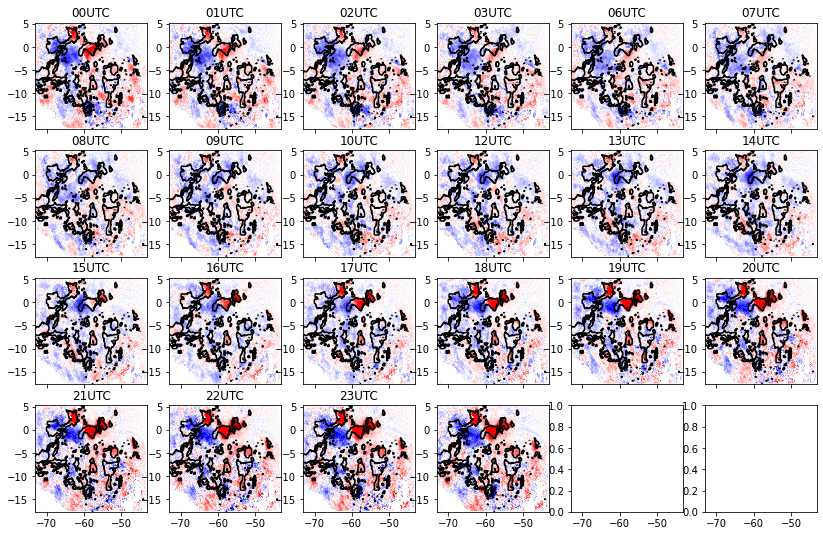

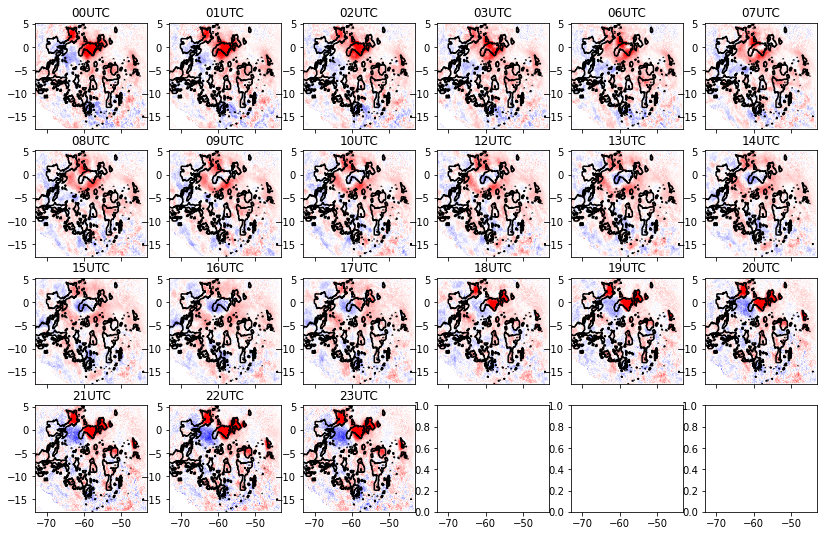

In [34]:
fig,axes = plt.subplots(4,6,figsize=(14,9),sharex=True)
axes = axes.ravel()  

fig2,axes2 = plt.subplots(4,6,figsize=(14,9),sharex=True)
axes2 = axes2.ravel()  

#fig3,axes3 = plt.subplots(4,6,figsize=(14,9),sharex=True)
#axes3 = axes3.ravel()  


int_levels=[1000,975,925,850,750,700,600,500,400,300,200,100]
hours=['00','01','02','03','06','07','08','09','10','12','13','14','15','16','17','18','19','20','21','22','23']

for ii in range(24):
    im=axes[ii].pcolormesh(lons,lats,theta_diurnal[ii,2,:,:],cmap='bwr',
                         vmin=-1.0,vmax=1.0)
    axes[ii].contour(lons,lats,dif_lu,colors='k',levels=[0])
    axes[ii].set_title(str(hours[ii])+'UTC')
    
    im2=axes2[ii].pcolormesh(lons,lats,theta_diurnal[ii,3,:,:],cmap='bwr',
                         vmin=-1.0,vmax=1.0)
    axes2[ii].contour(lons,lats,dif_lu,colors='k',levels=[0])
    axes2[ii].set_title(str(hours[ii])+'UTC')
    
#fig.colorbar(im,ax=axes[:4])
#fig.suptitle('Hour= '+hour+'UTC')



<ipython-input-58-755b037544f7>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axes[0].pcolormesh(lons,lats,theta[0,2,:,:],cmap='bwr',
<ipython-input-58-755b037544f7>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im=axes[1].pcolormesh(lons,lats,theta[0,3,:,:],cmap='bwr',


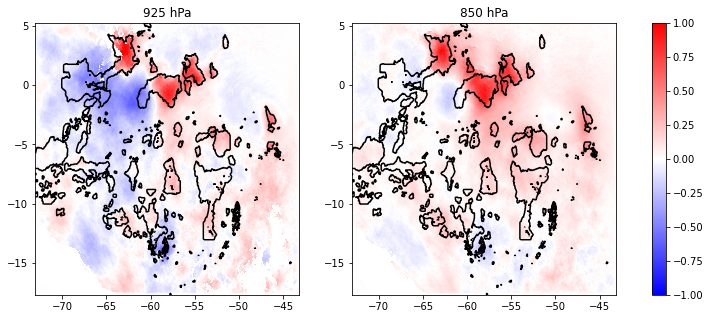

In [58]:
fig,axes = plt.subplots(1,2,figsize=(13,5),sharex=True)
axes = axes.ravel()  

axes[0].pcolormesh(lons,lats,theta[0,2,:,:],cmap='bwr',
                         vmin=-1.0,vmax=1.0)
axes[0].set_title('925 hPa')

im=axes[1].pcolormesh(lons,lats,theta[0,3,:,:],cmap='bwr',
                         vmin=-1.0,vmax=1.0)
axes[1].set_title('850 hPa')
axes[0].contour(lons,lats,dif_lu,colors='k',levels=[0])
axes[1].contour(lons,lats,dif_lu,colors='k',levels=[0])

fig.colorbar(im,ax=axes)




### Take the area-average of THeta to double-check the area-average is done correctly. 

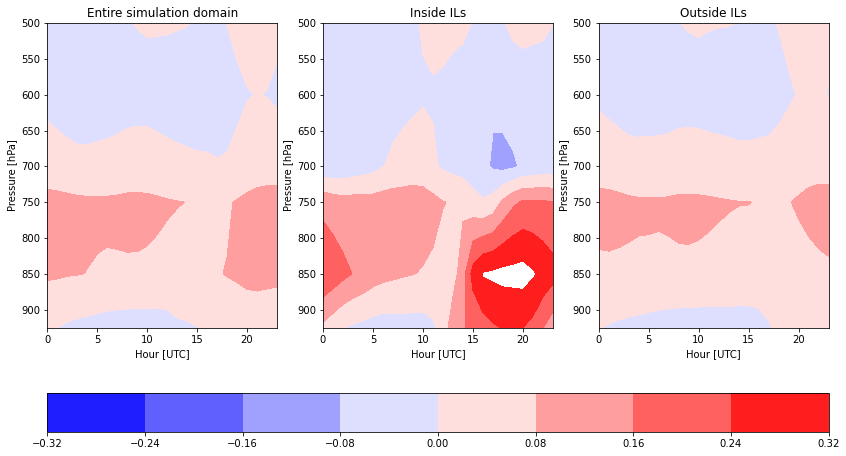

In [55]:
fig,axes = plt.subplots(1,3,figsize=(14,8),sharex=True)
axes = axes.ravel()  

aa = np.where(dif_lu>0,theta_diurnal,np.nan)
ave_IL=np.nanmean(aa,axis=(2,3))

aa = np.where(dif_lu==0,theta_diurnal,np.nan)
ave_out=np.nanmean(aa,axis=(2,3))

aa = theta_diurnal
ave=np.nanmean(aa,axis=(2,3))


axes[0].contourf(np.arange(24),int_levels,ave.transpose(),cmap='bwr',levels=np.arange(-0.32,0.33,0.08))
axes[1].contourf(np.arange(24),int_levels,ave_IL.transpose(),cmap='bwr',levels=np.arange(-0.32,0.33,0.08))
im=axes[2].contourf(np.arange(24),int_levels,ave_out.transpose(),cmap='bwr',levels=np.arange(-0.32,0.33,0.08))

fig.colorbar(im,ax=axes[:],orientation='horizontal')

titles=['Entire simulation domain','Inside ILs', 'Outside ILs']
for ii in range(3):
    axes[ii].invert_yaxis()
    axes[ii].set_title(titles[ii])
    axes[ii].set_ylim([925,500])
    axes[ii].set_xlabel('Hour [UTC]')
    axes[ii].set_ylabel('Pressure [hPa]')

# Vertical profile of inside the ILs

In [31]:
aa0 = np.load(path+'post_processing/Amazon561x721/Theta_areaave.obs.Noah.npy')
aa1 = np.load(path+'post_processing/Amazon561x721/Theta_IL_areaave.obs.Noah.day11_20.npy')

bb0 = np.load(path+'post_processing/Amazon561x721/Theta_areaave.ILgrassland.Noah.npy')
bb1 = np.load(path+'post_processing/Amazon561x721/Theta_IL_areaave.ILgrassland.Noah.day11_20.npy')

In [32]:
aa=np.vstack((aa0,aa1))
bb=np.vstack((bb0,bb1))

cc0 = np.reshape(aa,(30,24,12))
cc1 = np.reshape(bb,(30,24,12))

(925.0, 500.0)

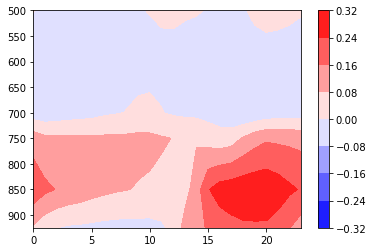

In [33]:
plt.contourf(np.arange(24),int_levels,cc1.mean(0).transpose()-cc0.mean(0).transpose(),cmap='bwr')
plt.colorbar()
plt.gca().invert_yaxis()
plt.ylim([925,500])

## Plot the time series of all 30 days.

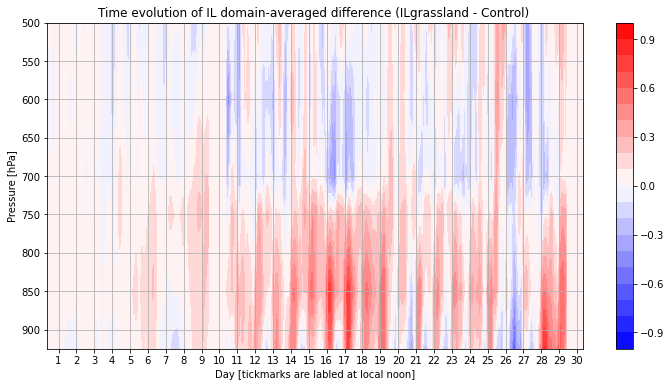

In [49]:
plt.rcParams["figure.figsize"] = (12,6)
plt.contourf(np.arange(720),int_levels,bb.transpose()-aa.transpose(),
            cmap='bwr',levels=np.arange(-1.0,1.01,0.1))
plt.colorbar()
plt.gca().invert_yaxis()
plt.ylim([925,500])
plt.xticks(np.arange(0+15,720,24),np.arange(1,31))
plt.xlabel('Day [tickmarks are labled at local noon]')
plt.ylabel('Pressure [hPa]')
plt.title('Time evolution of IL domain-averaged difference (ILgrassland - Control) ')
plt.grid()